In [22]:
%run convergence.py

In [23]:
%%time
H_inf = 2e12
f_a = 3e14
Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)
def f(Gamma_inf, m_a, i, j):
    n = i + j * len(m_a_list) + 1
    print("step:", n, "of", len(Gamma_inf_list) * len(m_a_list), end="")
    start = time.time()
    x = compute_asymmetry(H_inf, Gamma_inf, (m_a,), f_a, calc_init_time=True)
    end = time.time()
    print(" done (%f seconds)" % (end - start))
    return x
eta = np.array([[f(Gamma_inf, m_a, i, j) 
                 for i, m_a in enumerate(m_a_list)] for j, Gamma_inf in enumerate(Gamma_inf_list)])

step: 1 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/convergence.py:95: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


axion decay took: 0.23446178436279297 seconds
 done (2.329751 seconds)
step: 2 of 110axion decay took: 0.22472524642944336 seconds
 done (2.136956 seconds)
step: 3 of 110axion decay took: 0.22375178337097168 seconds
 done (2.231219 seconds)
step: 4 of 110axion decay took: 0.2097485065460205 seconds
 done (2.480922 seconds)
step: 5 of 110axion decay took: 0.20148825645446777 seconds
 done (3.170985 seconds)
step: 6 of 110axion decay took: 0.19357585906982422 seconds
 done (4.273830 seconds)
step: 7 of 110

KeyboardInterrupt: 

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

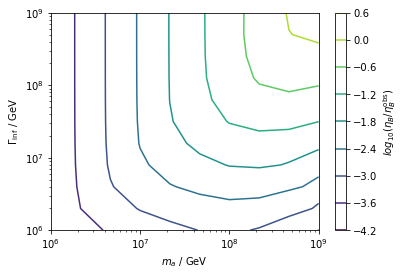

In [25]:
eta_observed = 6e-10 # from paper
plt.contour(m_a_list, Gamma_inf_list, np.log10(eta / eta_observed))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")